 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_data = whale_data.dropna().copy()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [6]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_data = algo_data.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(
    sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

C:\Users\dobin\AppData\Local\Temp\ipykernel_27672\2992700497.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
daily_return = sp500_history.pct_change()
daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
daily_return = daily_return.dropna().copy()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_return = daily_return.rename(columns = {"Close": "sp500_returns"} )

daily_return.head() 

,sp500_returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combine = pd.concat([whale_data,algo_data,daily_return], axis='columns', join='inner')
combine

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

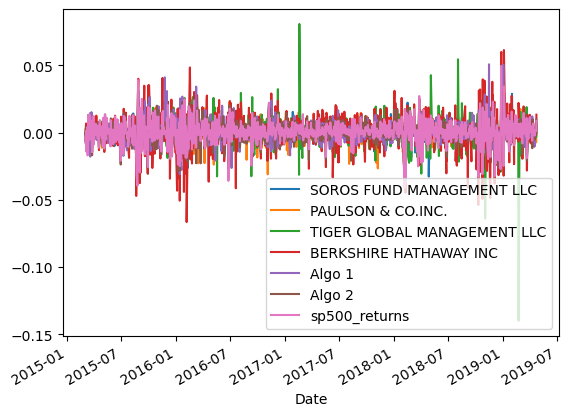

In [15]:
# Plot daily returns of all portfolios
returns = combine.plot ()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

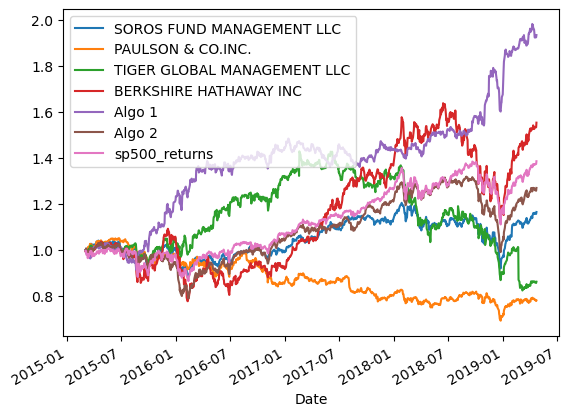

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combine).cumprod()

# Plot cumulative returns
cumulative_returns.plot ()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

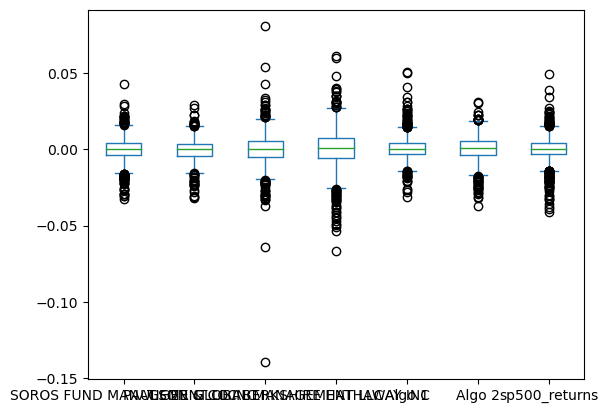

In [17]:
# Box plot to visually show risk
combine.plot.box()

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combine.std ()
all_portfolio_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500_returns                  0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
daily_std = combine.std()
daily_std.head(7)
# Determine which portfolios are riskier than the S&P 500
# TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are more riskier

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500_returns                  0.008554
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500_returns                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

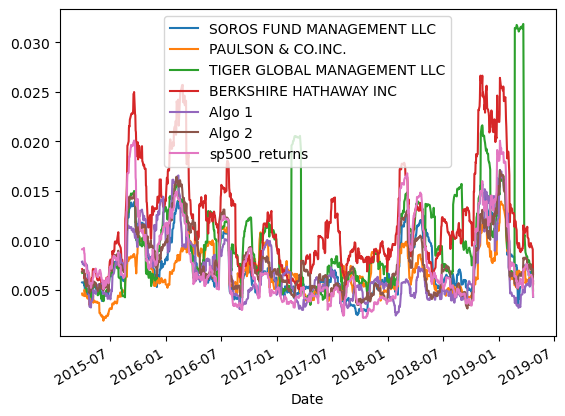

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combine.rolling(window=21).std().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

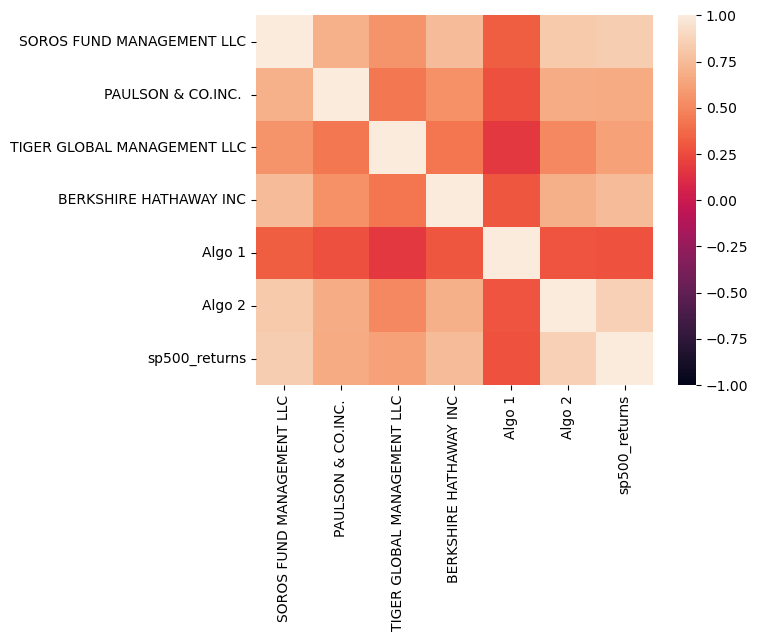

In [22]:
# Calculate the correlation
correlation = combine.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

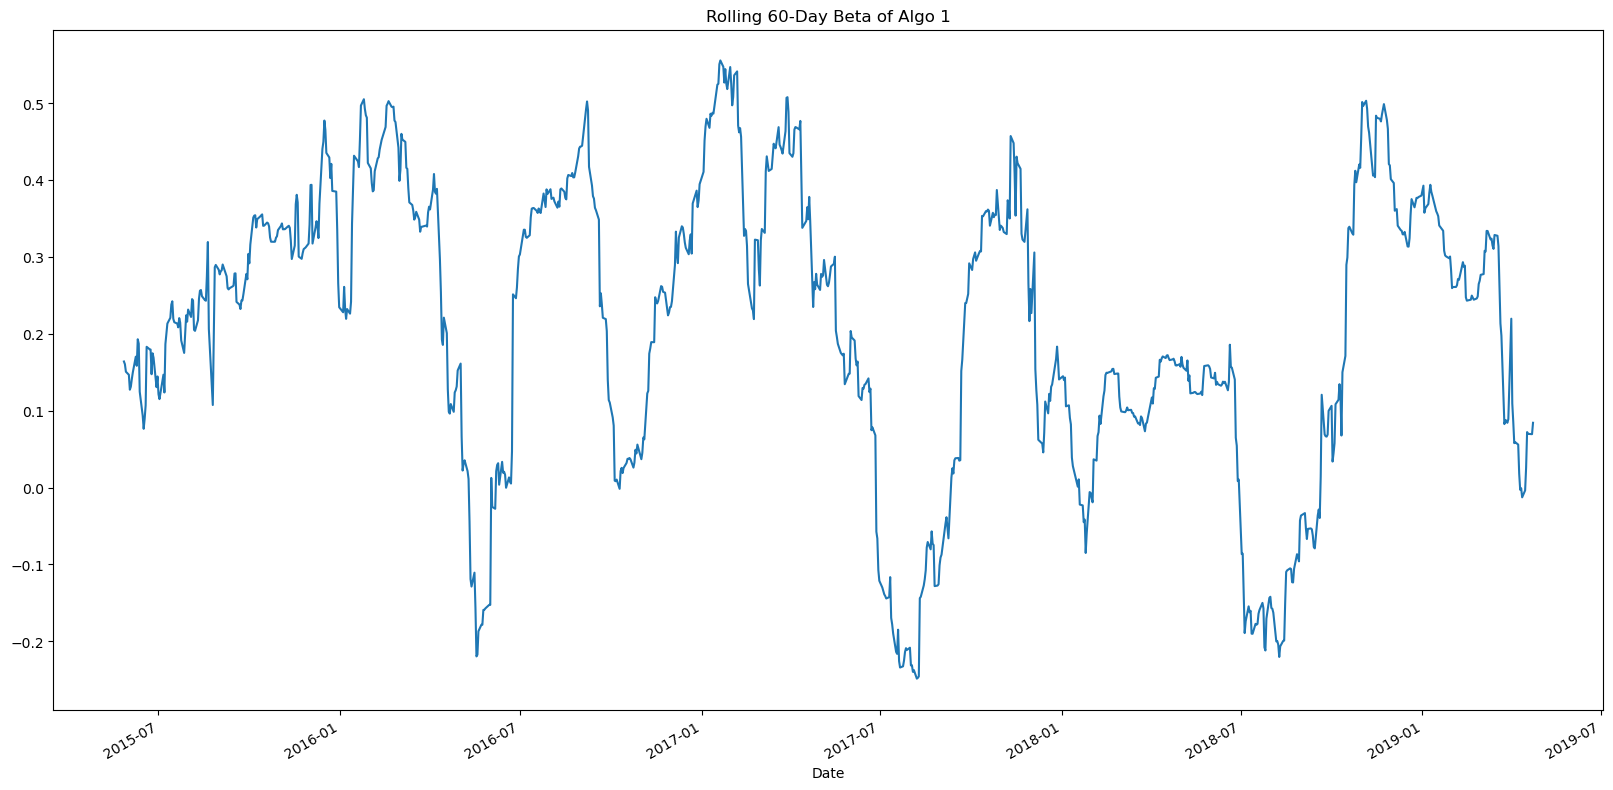

In [23]:
# Calculate covariance of a single portfolio
Algo_covariance = combine['Algo 1'].rolling(window=60).cov(combine['sp500_returns'])
Algo_covariance
# Calculate variance of S&P 500
variance = combine['sp500_returns'].rolling(60).var()

# Computing beta
beta = Algo_covariance/variance

# Plot beta trend
beta_fig = beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combine.mean()-combine['sp500_returns'].mean()) * 252) / (combine.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
sp500_returns                  0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

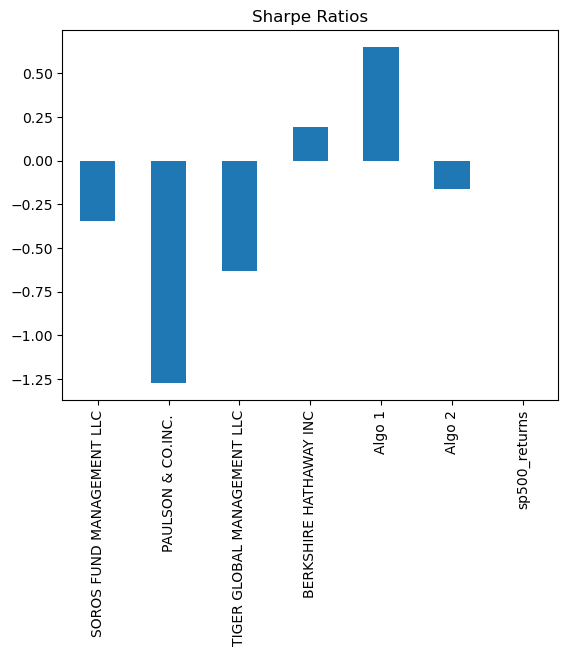

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Only BERKSHIRE HATHAWAY INC and Algo 1 outperform the S&P500 although by very small margins

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl_data = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [28]:
# Reading data from 2nd stock
cost_path = Path("Resources/cost_historical.csv")
cost_data = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [29]:
# Reading data from 3rd stock
goog_path = Path("Resources/goog_historical.csv")
goog_data = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [30]:
# Combine all stocks in a single DataFrame
custom_combined = pd.concat([aapl_data,cost_data,goog_data], axis='rows', join='inner')
custom_combined = custom_combined.reset_index()
custom_combined.head ()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75


In [31]:
custom_combined = custom_combined.set_index("Trade DATE")
custom_combined.head ()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [32]:
portfolio = custom_combined.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")

In [33]:
# Calculate daily returns
portfolio = portfolio.pct_change()

# Drop NAs
portfolio = portfolio.dropna().copy()
# Display sample data
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = weights*portfolio
# Display sample data
weighted_returns.head ()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.000778,0.000204,0.000589
2018-05-15,-0.003029,-0.000681,-0.006353
2018-05-16,0.003111,0.005508,0.000785
2018-05-17,-0.002108,0.001493,-0.000980
2018-05-18,-0.001212,-0.001069,-0.003780


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
new_combined = pd.concat([combine, weighted_returns], axis='columns', join='inner')
new_combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns,AAPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.000778,0.000204,0.000589
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.003029,-0.000681,-0.006353
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.003111,0.005508,0.000785
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.002108,0.001493,-0.000980
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.001212,-0.001069,-0.003780
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000033,-0.001340,0.001646
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.006491,0.000299,0.002502
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001198,0.000339,0.000008
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001096,-0.003241,0.003362


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined = new_combined.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`

new_combined_std = new_combined.std ()

annualized_stdv = new_combined_std * np.sqrt(252)
annualized_stdv.head(7)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500_returns                  0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

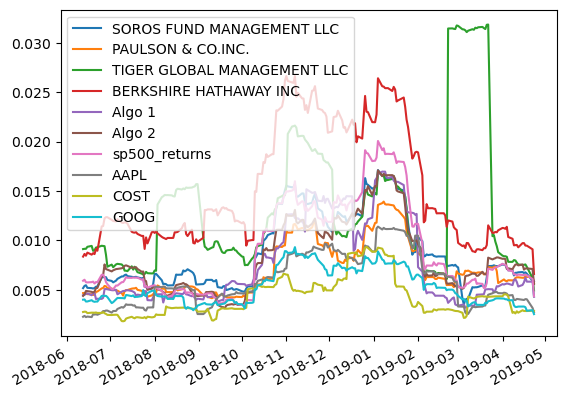

In [38]:
# Calculate rolling standard deviation
new_combined.rolling(window=21).std().plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

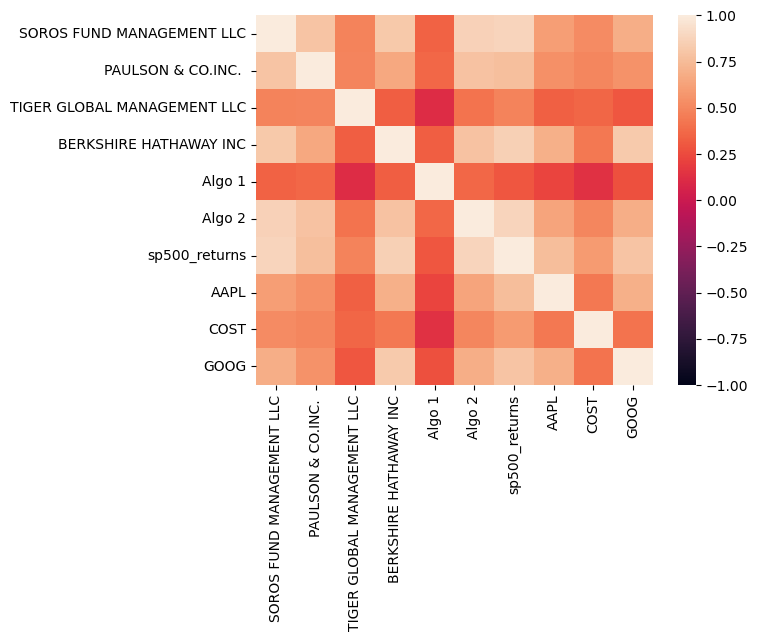

In [43]:
# Calculate and plot the correlation
correlation = new_combined.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

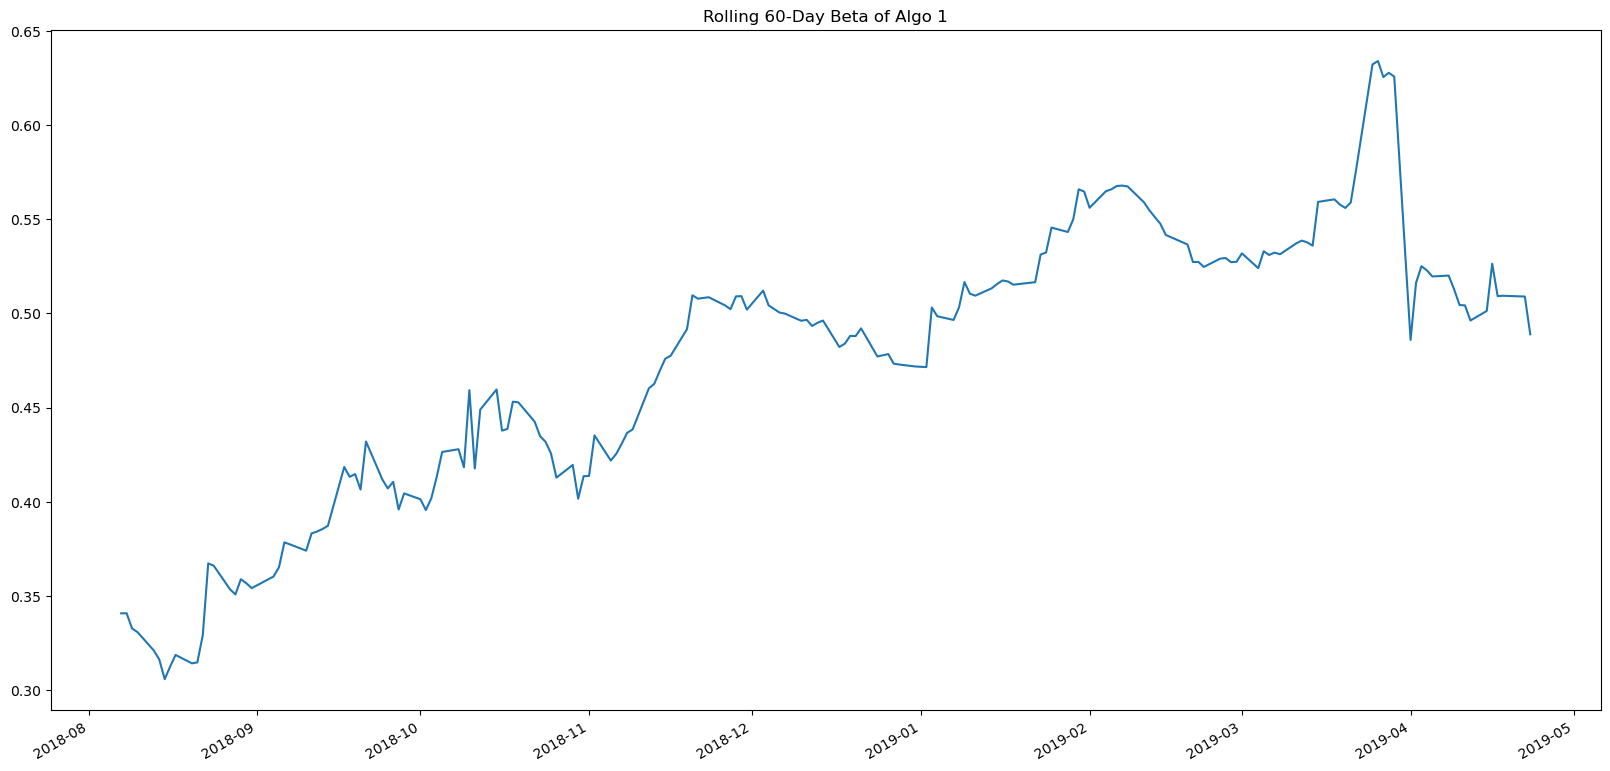

In [45]:
# Calculate and plot Beta
combined_covariance = new_combined['AAPL'].rolling(window=60).cov(new_combined['sp500_returns'])
combined_covariance
# Calculate variance of S&P 500
new_variance = new_combined['sp500_returns'].rolling(60).var()

# Computing beta
new_beta = combined_covariance/new_variance

# Plot beta trend
beta_fig = new_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = ((new_combined.mean()-new_combined['sp500_returns'].mean()) * 252) / (new_combined.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.175552
PAULSON & CO.INC.             -0.503043
TIGER GLOBAL MANAGEMENT LLC   -1.416635
BERKSHIRE HATHAWAY INC        -0.200036
Algo 1                         1.370582
Algo 2                        -0.556585
sp500_returns                  0.000000
AAPL                          -0.407522
COST                          -0.013738
GOOG                          -0.330085
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

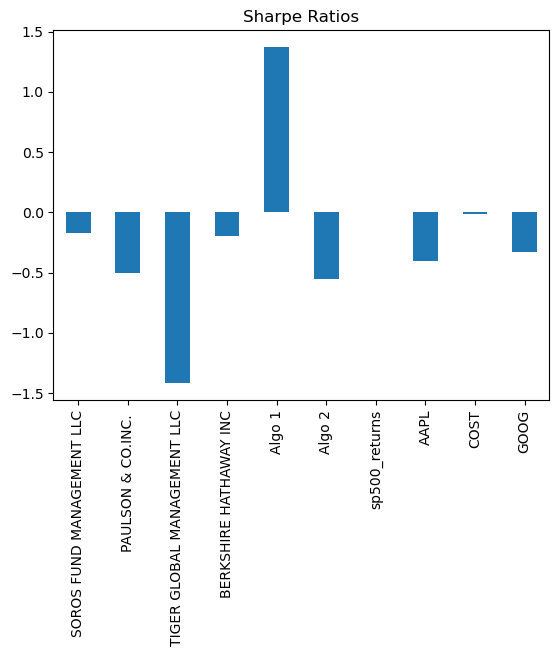

In [47]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Not very well, the sharpe ratio shows that my portfolio is not preferable compared to the S&P 500